# THE SPARKS FOUNDATION
# Data Science and Business Analytics Intern
# Task 1 - Prediction using Supervised Machine Learning
# To Predict the percentage of marks of the students based on the number of hours they studied
# Made with ❤️ by Nishaanth K

# 1) Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

# 2) Loading Dataset

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

# 3) Exploring Dataset 

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull == True

False

### There is no null value in the Dataset .Our dataset is perfectly alright. So, we can now visualize our Data.

# 4) Performing Data Visualization

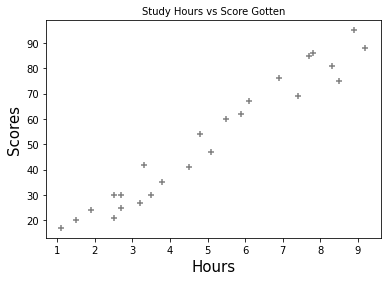

In [7]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Study Hours vs Score Gotten', fontsize=10)
plt.scatter(data["Hours"],data["Scores"],color='grey',marker='+')
plt.show()

### This indicates positive linear relationship as much as hours you study is a chance of high scoring, Lets plot a regression line to confirm the correlation.

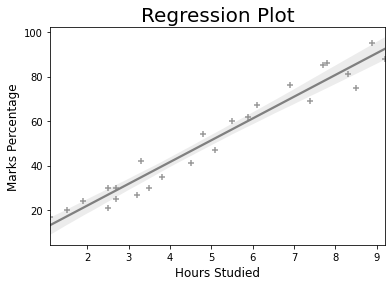

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'],color='grey',marker='+')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

### It is confirmed that the variables are positively correlated.

# 5) Training the Model

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)
linmodel = LinearRegression()
linmodel.fit(train_x, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# 6) Predicting the Percentage of Marks

In [10]:
pred_y = linmodel.predict(test_x)
predicted = pd.DataFrame({'Hours': [i[0] for i in test_x], 'Predicted Scores': [new for new in pred_y]})
predicted

,Hours,Predicted Scores
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Let's collate the Predicted Marks with the Actual Marks

In [11]:
collated_values = pd.DataFrame({'Actual Scores': test_y, 'Predicted Scores': pred_y})
collated_values

,Actual Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Let's Visualize the collated values

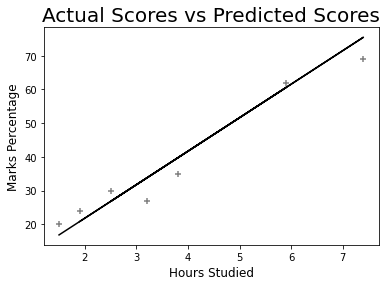

In [12]:
plt.scatter(x=test_x, y=test_y, color='grey',marker='+')
plt.plot(test_x, pred_y, color='Black')
plt.title('Actual Scores vs Predicted Scores', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Let's check the Accuracy of our Model

In [13]:
acc=metrics.r2_score(test_y,pred_y)
acc

0.9367661043365056

## Above 94% percentage indicates that above Model is seems to be a "GOOD MODEL".
## This satisfies me maximum 😇

# Model Evaluation

In [14]:
print("Mean Squared Error",metrics.mean_squared_error(test_y,pred_y))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(test_y,pred_y)))
print("Mean Absolute Error: ",mean_absolute_error(test_y,pred_y))

Mean Squared Error 20.33292367497996
Root Mean Squared Error:  4.509204328368805
Mean Absolute Error:  4.130879918502482


# Sounds Good 😍
# Let's find the solution for the problem given

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [15]:
hours = [9.25]
answer = linmodel.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# Conclusion

## According to our model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.